<a href="https://colab.research.google.com/github/tpemartin/111-1-econDV/blob/main/week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data

  * <https://od.moi.gov.tw/api/v1/rest/datastore/301000000A-001661-009>


In [ ]:
if(!require(showtext)) install.packages("showtext")
showtext::showtext_auto()
library(ggplot2)
# set our graph theme to use the google font and a classic white back ground
theme_set(
  theme(
    text=element_text(family = "Noto Sans TC")
  )+
    theme_classic()
)

Loading required package: showtext

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘showtext’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sysfonts’, ‘showtextdb’




In [ ]:
googledrive::drive_deauth()
googledrive::drive_download(
  file=googledrive::as_id("https://drive.google.com/file/d/1K8IWyy7G9LAKewjVXMGD8kUbbvjGoRT7/view?usp=sharing"),
  overwrite = T
)

File downloaded:

• marriage.csv <id: 1K8IWyy7G9LAKewjVXMGD8kUbbvjGoRT7>

Saved locally as:

• marriage.csv



In [ ]:
library(readr)
marriage <- read_csv("marriage.csv")
head(marriage)

Rows: 746305 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): statistic_yyy, according, site_id, marriage_type, female_age_or_spo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


statistic_yyy,according,site_id,marriage_type,female_age_or_spouse1,male_age_or_spouse2,marry_pair
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
統計年度,按照別,區域別,婚姻類型,女方年齡或配偶一方年齡,男方年齡或配偶另一方年齡,結婚對數
110,按登記日期分,新北市板橋區,不同性別,未滿15歲,未滿15歲,0
110,按登記日期分,新北市板橋區,不同性別,未滿15歲,15歲,0
110,按登記日期分,新北市板橋區,不同性別,未滿15歲,16歲,0
110,按登記日期分,新北市板橋區,不同性別,未滿15歲,17歲,0
110,按登記日期分,新北市板橋區,不同性別,未滿15歲,18歲,0


In [ ]:
library(dplyr)
marriageTaoYuan = {
  marriage |>
    dplyr::filter(
      # 只看桃園市
      stringr::str_detect(site_id,"桃園市")
    ) -> marriageTaoYuan
  marriageTaoYuan |>
    # 創造行政區欄位
    mutate(
      site_id2 = stringr::str_sub(site_id,4,6)
    ) 
  
}

```
marriageTaoYuan = { ... } 
```

bind `marriageTaoYuan` with the last visible value in the programming block `{...}`. In this case, it is the last `mutate` step output

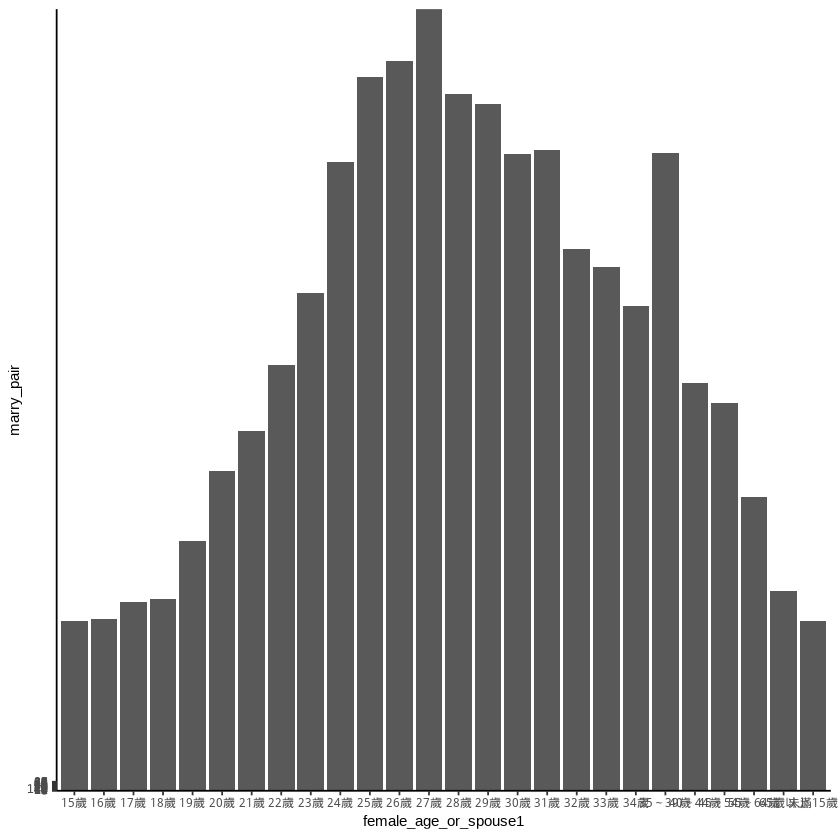

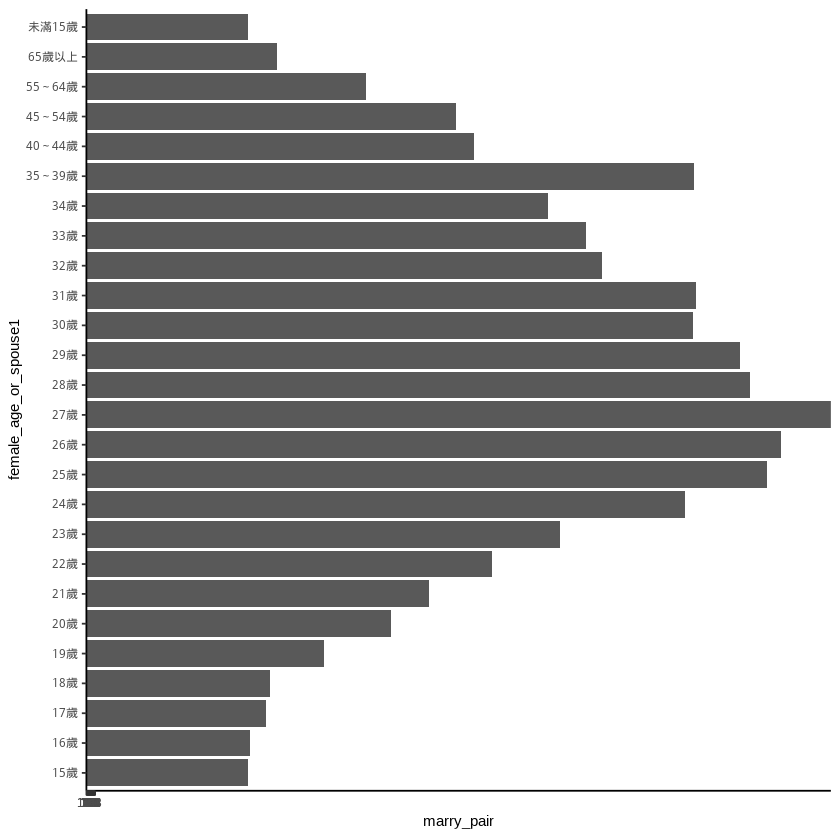

In [ ]:
# 結婚年齡
# X：以妻年齡來看
# Y：對數
library(ggplot2)
plt = new.env()
plt$ggplot = ggplot(data=marriageTaoYuan)
plt$geoms = list(
  geom_col(
    mapping=aes(
      x=female_age_or_spouse1,
      y=marry_pair
    ),
    position="stack" # sum across sites within same age group.
  )
)
plt$ggplot + plt$geoms

# To solve the text horizontal overlapping problem, 
plt$ggplot + plt$geoms + coord_flip()

Another way to solve horizontal text overlapping problem is to tilt text on the axis.

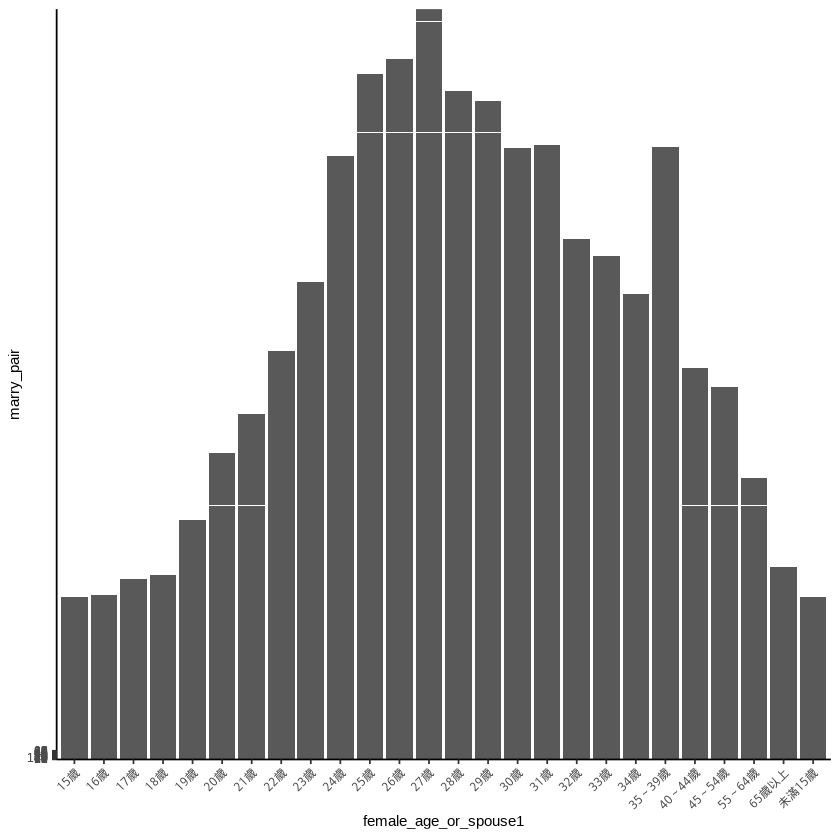

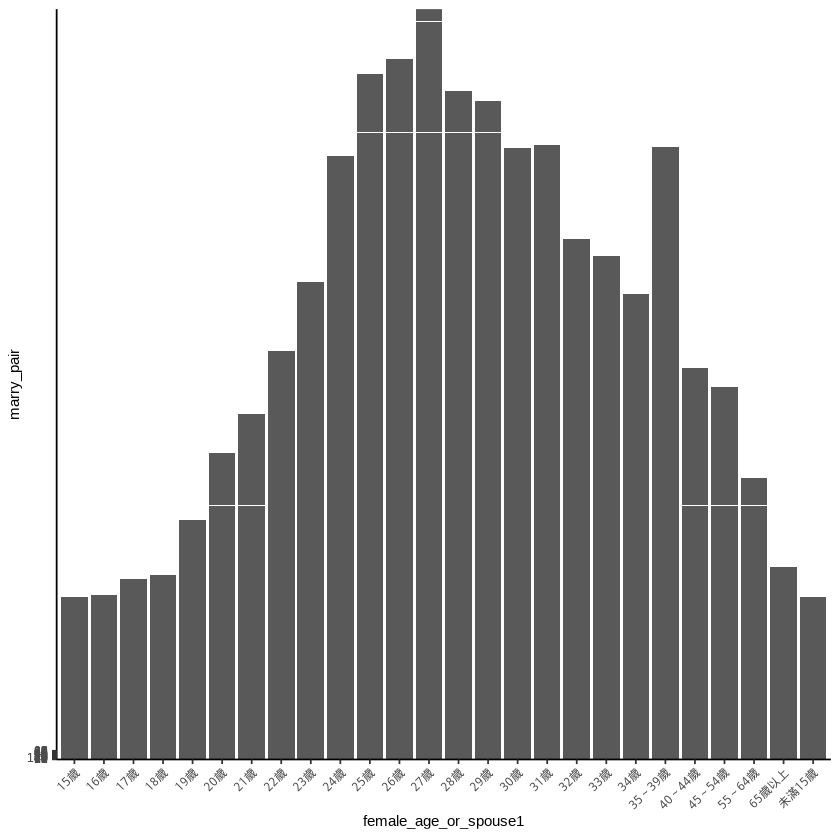

In [ ]:
plt$ggplot + plt$geoms+
  theme(
    axis.text.x = element_text(
      angle=45,
      hjust = 1 # define text position base point using its tail
    )
  )

plt$theme = theme(
    axis.text.x = element_text(
      angle=45,
      hjust = 1 # define text position base point using its tail
    )
  )

plt$ggplot + plt$geoms + plt$theme

# Y look weird

## Check class

In [ ]:
marriageTaoYuan |>
  purrr::map(class)


$statistic_yyy
[1] "character"

$according
[1] "character"

$site_id
[1] "character"

$marriage_type
[1] "character"

$female_age_or_spouse1
[1] "character"

$male_age_or_spouse2
[1] "character"

$marry_pair
[1] "character"

$site_id2
[1] "character"

In [ ]:
marriageTaoYuan |>
  mutate(
    marry_pair = as.integer(marry_pair)
  ) -> marriageTaoYuan

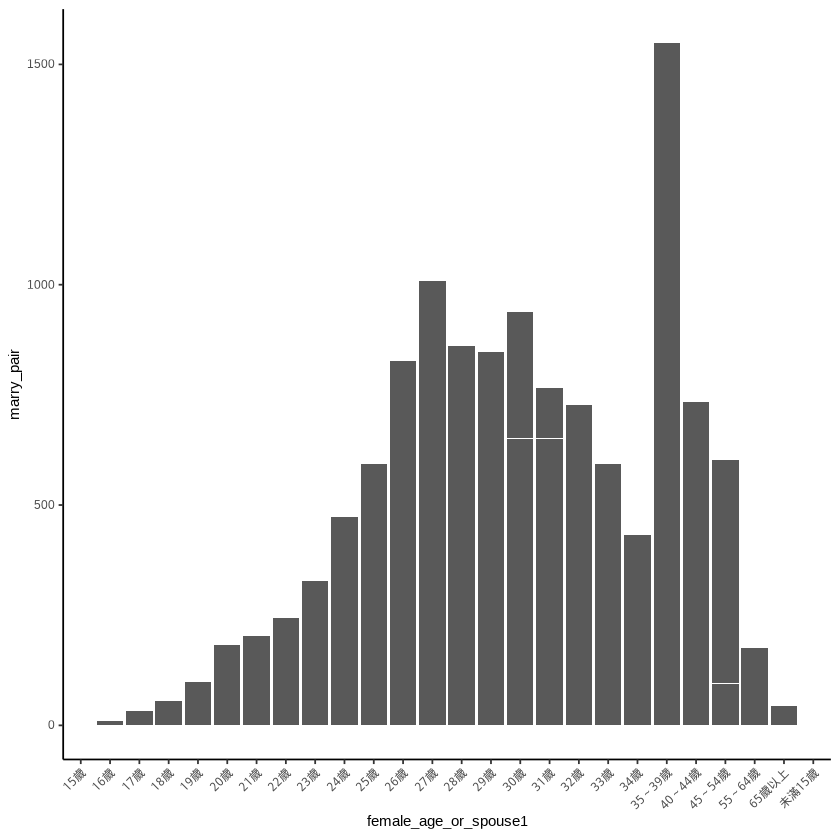

In [ ]:
plt$ggplot = ggplot(data=marriageTaoYuan)
plt$theme = theme(
  axis.text.x = element_text(
    angle=45, hjust=1
  )
)
plt$ggplot + plt$geoms +  plt$theme

In [ ]:
marriageTaoYuan$female_age_or_spouse1 |>
  factor() |>
  levels() -> defaultLevels
lastIndex = length(defaultLevels)

c(
  defaultLevels[[lastIndex]], # "未滿15歲",
  defaultLevels[-lastIndex]
) -> correctLevels

marriageTaoYuan$female_age_or_spouse1 |>
  factor(
    levels=correctLevels
  ) -> marriageTaoYuan$female_age_or_spouse1


# Data cleanning and manipulation

Data cleanning and manipulation are normally targeting a data frame result to be used in graph or table. In each step, the following step expects a data frame to start with.

In the above case, we start with a flawed `marriageTaoYuan` do class correction to achieve a correct-class `marriageTaoYuan`. We can write it as a programming block, putting desired output data frame as the last line:
```
{
  marriageTaoYuan$female_age_or_spouse1 |>
    factor() |>
    levels() -> defaultLevels
  lastIndex = length(defaultLevels)

  c(
    defaultLevels[[lastIndex]], # "未滿15歲",
    defaultLevels[-lastIndex]
  ) -> correctLevels

  marriageTaoYuan$female_age_or_spouse1 |>
    factor(
      levels=correctLevels
    ) -> marriageTaoYuan$female_age_or_spouse1

  marriageTaoYuan # this is added as the last line to represents the desired output
}
```

Every programming block can be turned into a function. In our case,
```
correctClass = function(marriageTaoYuan){

  # marry_pair should be numeric
  marriageTaoYuan |>
  mutate(
    marry_pair = as.integer(marry_pair)
  ) -> marriageTaoYuan

  # female_age_or_spouse1 should have the right levels
  marriageTaoYuan$female_age_or_spouse1 |>
    factor() |>
    levels() -> defaultLevels
  lastIndex = length(defaultLevels)

  c(
    defaultLevels[[lastIndex]], # "未滿15歲",
    defaultLevels[-lastIndex]
  ) -> correctLevels

  marriageTaoYuan$female_age_or_spouse1 |>
    factor(
      levels=correctLevels
    ) -> marriageTaoYuan$female_age_or_spouse1

  return(marriageTaoYuan) # this is added as the last line to represents the desired output
}
```

With this setup, we can put this correctClass function in other `.R` file. When we need it, we can 
```
source("path to the .R file")

marriageTaoYuan |> correctClass() -> marriageTaoYuan
```

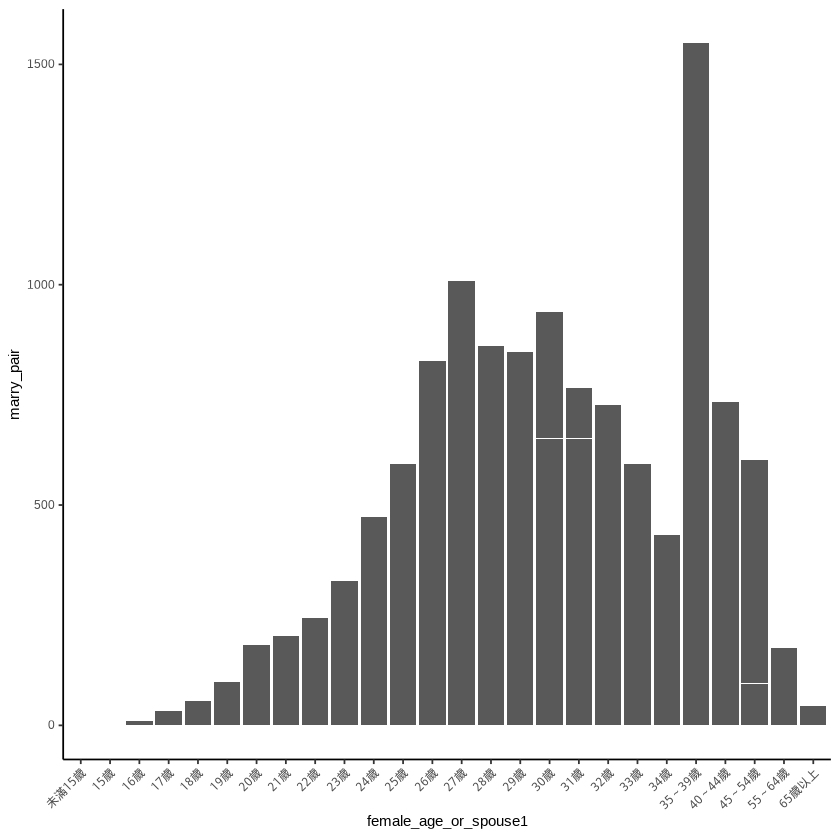

In [ ]:
plt$ggplot = ggplot(data=marriageTaoYuan)
plt$theme = theme(
  axis.text.x = element_text(
    angle=45, hjust=1
  )
)
plt$ggplot + plt$geoms +  plt$theme

# 哪個行政區的女性較晚婚

晚婚：30＋

Suppose you want to use geom_col to show the evidence. You can try to write down the mapping in `geom_col`. If there is no column that fit the mapping need, just makeup a column name that by looking at the name you know what that column means, and furthermore what targert column that you want. 

In [ ]:
geom_col(
  mapping = aes(
    x = site_id2,
    y = prop_female_lateMarriage
  )
)

Here, we write down `prop_female_lateMarriage` meaning proportion of female who married late. 

"每個行政區，在登記結婚的女性中晚婚的比率"


*   計算每個行政區登記對數
*   計算每個行政區女性晚婚的登記對數
*   每個行政區女性晚婚的登記比率 ＝每個行政區女性晚婚的登記對數/每個行政區的登記對數



In [ ]:
# 計算每個（group_by)行政區登記對數(mutate(total_marry_pair = ...))
marriageTaoYuan |>
  group_by(site_id2) |>
  summarise(
    total_marry_pair = sum(marry_pair)
  ) -> marriageTaoYuanTotal

# 計算每個（group_by)行政區女性晚婚(condition)登記對數(mutate(late_marry_pair = ...))
marriageTaoYuan |>
  dplyr::filter(
    # 女性晚婚條件
    female_age_or_spouse1 %in% c("30歲", "31歲", "32歲", "33歲", "34歲", "35～39歲", 
"40～44歲", "45～54歲", "55～64歲", "65歲以上")
  ) |>
  group_by(site_id2) |>
  summarise(
    late_marry_pair = sum(marry_pair)
  ) -> marriageTaoYuanLate

# 每個行政區女性晚婚的登記比率
marriageTaoYuanLate |> 
  left_join(marriageTaoYuanTotal,
    by=c("site_id2")) -> 
  marriageTaoYuanLate
marriageTaoYuanLate |>
  mutate(
    prop_marry_pair_late = 
      late_marry_pair/total_marry_pair
  ) -> marriageTaoYuanLate
marriageTaoYuanLate

site_id2,late_marry_pair,total_marry_pair,prop_marry_pair_late
<chr>,<int>,<int>,<dbl>
中壢區,1329,2407,0.5521396
八德區,615,1143,0.5380577
大園區,215,487,0.4414784
大溪區,219,453,0.4834437
平鎮區,627,1178,0.5322581
復興區,31,83,0.3734940
新屋區,123,259,0.4749035
桃園區,1419,2555,0.5553816
楊梅區,484,940,0.5148936



the condition levels can be done through:
```
marriageTaoYuan$marry_pair |> 
  as.integer() -> marriageTaoYuan$marry_pair
allLevels = levels(marriageTaoYuan$female_age_or_spouse1)
lateMarriageLevels = allLevels[-c(1:16)]
lateMarriageLevels |> dput()
```



We can also put the above program as a function with df-in-df-out feature:


In [ ]:
prepareProportionFemaleLateMarriage = function(marriageTaoYuan){
  # 計算每個（group_by)行政區登記對數(mutate(total_marry_pair = ...))
  marriageTaoYuan |>
    group_by(site_id2) |>
    summarise(
      total_marry_pair = sum(marry_pair)
    ) -> marriageTaoYuanTotal

  # 計算每個（group_by)行政區女性晚婚(condition)登記對數(mutate(late_marry_pair = ...))
  marriageTaoYuan |>
    dplyr::filter(
      # 女性晚婚條件
      female_age_or_spouse1 %in% c("30歲", "31歲", "32歲", "33歲", "34歲", "35～39歲", 
  "40～44歲", "45～54歲", "55～64歲", "65歲以上")
    ) |>
    group_by(site_id2) |>
    summarise(
      late_marry_pair = sum(marry_pair)
    ) -> marriageTaoYuanLate

  # 每個行政區女性晚婚的登記比率
  marriageTaoYuanLate |> 
    left_join(marriageTaoYuanTotal,
      by=c("site_id2")) -> 
    marriageTaoYuanLate
  marriageTaoYuanLate |>
    mutate(
      prop_marry_pair_late = 
        late_marry_pair/total_marry_pair
    ) -> marriageTaoYuanLate
  marriageTaoYuanLate
}

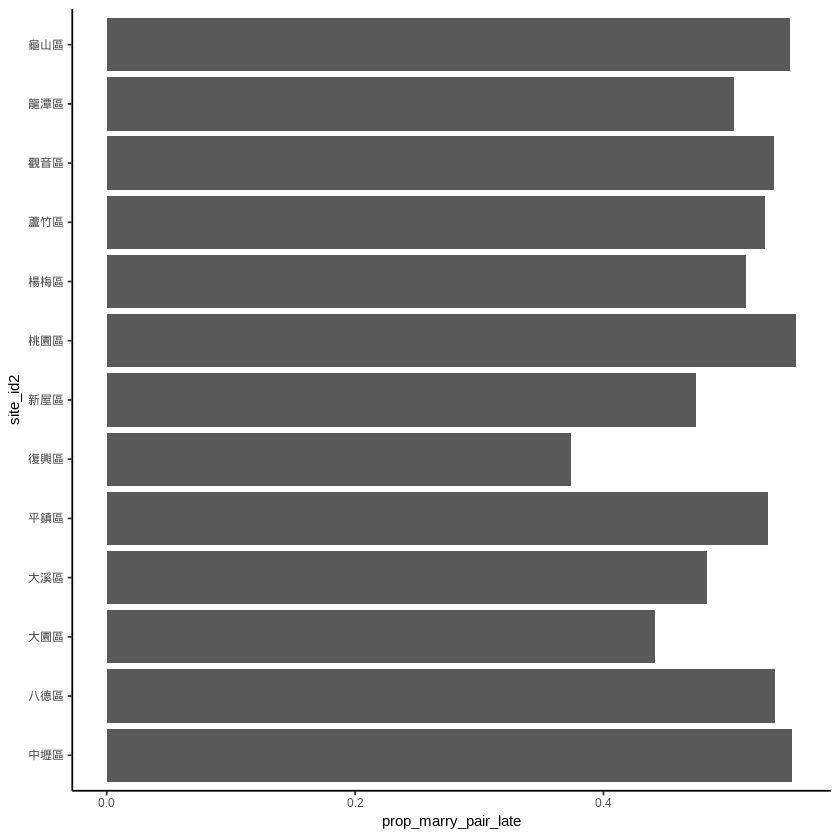

In [ ]:
marriageTaoYuan |> 
  prepareProportionFemaleLateMarriage() ->
  marriageTaoYuanLate

ggplot(data=marriageTaoYuanLate)+
geom_col(
  mapping=aes(
    x=site_id2,
    y=prop_marry_pair_late
  )
) + coord_flip()